# 732A92 - Project Code - Preprocessing and Baselines

## Data set

In [2]:
import pandas as pd

train_raw = pd.read_csv('train.csv')

In [3]:
train_raw.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


## Visualization for class distribution and review lengths

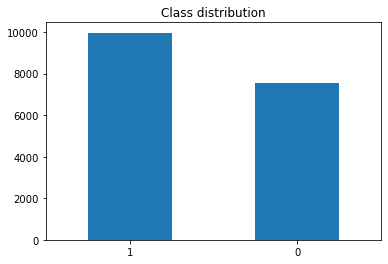

In [3]:
import matplotlib.pyplot as plt

train_raw['user_suggestion'].value_counts().plot(kind='bar', rot=0)
plt.title('Class distribution')
plt.xticks(rotation = 0)
plt.savefig('distribution.png')
plt.show()

In [75]:
max_len = 0
rlength = []

for i in range(train_raw.shape[0]):
    length = len(train_raw.user_review[i].split())
    rlength.append(length)
    if length > max_len:
        max_len = length

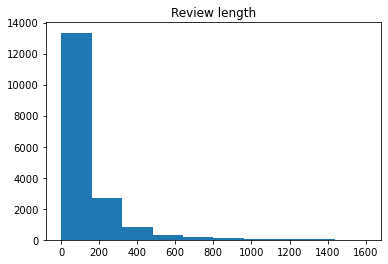

In [76]:
plt.hist(rlength)
plt.title('Review length')
plt.savefig('length.png')
plt.show()

## Preprocessing the data

In [4]:
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
nlp = spacy.load("en_core_web_lg", exclude=["parser", "ner"])

# Remove stop words and non-alphabetic tokens
def preprocess(text):
    doc = nlp(text)
    res = ""
    for token in doc:
        if token.is_stop != True and token.is_alpha == True:
            res = res + " "+ token.text.lower()
    return res

train_full = train_raw.drop(['review_id', 'year'], axis=1)

train_full['ur_prep'] = 'na'
train_full['ur_prep'] = train_full['user_review'].apply(preprocess)

In [38]:
train_full.head()

,title,user_review,user_suggestion,ur_prep
0,Spooky's Jump Scare Mansion,I'm scared and hearing creepy voices. So I'll...,1,scared hearing creepy voices pause moment wri...
1,Spooky's Jump Scare Mansion,"Best game, more better than Sam Pepper's YouTu...",1,best game better sam pepper youtube account n...
2,Spooky's Jump Scare Mansion,"A littly iffy on the controls, but once you kn...",1,littly iffy controls know play easy master fl...
3,Spooky's Jump Scare Mansion,"Great game, fun and colorful and all that.A si...",1,great game fun colorful note getting windowed...
4,Spooky's Jump Scare Mansion,Not many games have the cute tag right next to...,1,games cute tag right horror tag steam played ...


### Visualize most common words

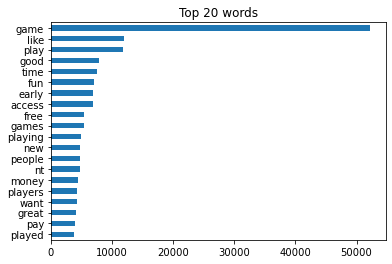

In [52]:
pd.Series(' '.join(train_full['ur_prep']).split()).value_counts()[:20].sort_values().plot(kind='barh', sort_columns=True)
plt.title("Top 20 words")
plt.savefig('words.png')
plt.show()

### Remove the 5 longest reviews to cut the length from 1600 to 698

In [81]:
max_len = 0
rlength = []
for i in range(train_full.shape[0]):
    length = len(train_full.ur_prep[i].split())
    rlength.append(length)
    if length > max_len:
        max_len = length

top_5_idx = np.argsort(rlength)[-5:]
train_full = train_full.drop(top_5_idx, axis=0)
train_full = train_full.reset_index

## Create or load final data sets
### Choose one of the following two code blocks

### Create data sets from preprocessing

In [ ]:
# Splitting the data - uncomment if no access to saved files
#df_train, df_val = train_test_split(train_full, test_size=0.2)
#df_val, df_test = train_test_split(df_val, test_size=0.5)

### Read data sets from files

In [24]:
df_train = pd.read_csv('df_train.csv')
df_val = pd.read_csv('df_val.csv')
df_test = pd.read_csv('df_test.csv')

### Remove NaN entries

In [25]:
df_train.dropna(subset = ["ur_prep"], inplace=True)
df_val.dropna(subset = ["ur_prep"], inplace=True)
df_test.dropna(subset = ["ur_prep"], inplace=True)

In [26]:
print(train_raw.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(17494, 5)
(12227, 7)
(2618, 7)
(2622, 7)


## Naive Bayes classifier

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('MNB', MultinomialNB())])
pipe.fit(df_train['ur_prep'], df_train['user_suggestion'])

testpreds = pipe.predict(df_val['ur_prep'])
print(classification_report(df_val['user_suggestion'], testpreds))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1093
           1       0.77      0.95      0.85      1525

    accuracy                           0.80      2618
   macro avg       0.83      0.77      0.78      2618
weighted avg       0.82      0.80      0.79      2618



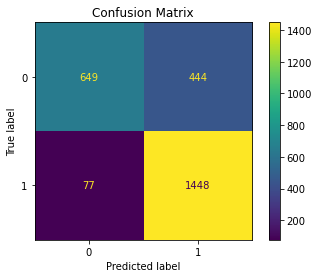

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(df_val['user_suggestion'], testpreds))
disp.plot()
plt.title('Confusion Matrix')
plt.savefig('cm_default.png')
plt.show()

## Baselines

In [11]:
from sklearn.dummy import DummyClassifier

pipe2 = Pipeline([('vectorizer', TfidfVectorizer()), ('Dummy1', DummyClassifier(strategy='stratified'))])
pipe2.fit(df_train['ur_prep'], df_train['user_suggestion'])

testpreds2 = pipe2.predict(df_val['ur_prep'])
print(classification_report(df_val['user_suggestion'], testpreds2))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1093
           1       0.59      0.59      0.59      1525

    accuracy                           0.52      2618
   macro avg       0.51      0.51      0.51      2618
weighted avg       0.53      0.52      0.53      2618



In [12]:
pipe3 = Pipeline([('vectorizer', TfidfVectorizer()), ('Dummy1', DummyClassifier(strategy='most_frequent'))])
pipe3.fit(df_train['ur_prep'], df_train['user_suggestion'])

testpreds3 = pipe3.predict(df_val['ur_prep'])
print(classification_report(df_val['user_suggestion'], testpreds3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1093
           1       0.58      1.00      0.74      1525

    accuracy                           0.58      2618
   macro avg       0.29      0.50      0.37      2618
weighted avg       0.34      0.58      0.43      2618



C:\Users\Ottos-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ottos-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ottos-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Creating a balanced data set with oversampling

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(random_state=69)
X_balanced, y_balanced = ros.fit_resample(df_train.ur_prep.values.reshape(-1, 1), df_train.user_suggestion)

In [52]:
df_balanced = pd.DataFrame(X_balanced, columns=['ur_prep'])
df_balanced['user_suggestion'] = y_balanced

In [60]:
df_balanced.head()
df_balanced.to_csv('df_balanced.csv')

In [54]:
pipe4 = Pipeline([('vectorizer', TfidfVectorizer()), ('MNB', MultinomialNB())])
pipe4.fit(df_balanced['ur_prep'], df_balanced['user_suggestion'])

testpreds4 = pipe4.predict(df_val['ur_prep'])
print(classification_report(df_val['user_suggestion'], testpreds4))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1093
           1       0.87      0.80      0.84      1525

    accuracy                           0.82      2618
   macro avg       0.81      0.82      0.81      2618
weighted avg       0.82      0.82      0.82      2618



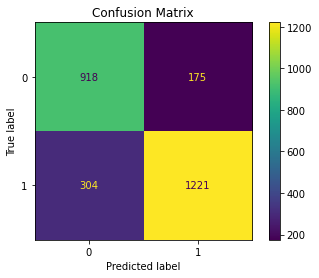

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix(df_val['user_suggestion'], testpreds4))
disp.plot()
plt.title('Confusion Matrix')
plt.savefig('cm_balanced.png')
plt.show()

## Grid search

In [56]:
# TODO: Write code here to implement the grid search
from sklearn.model_selection import GridSearchCV

parameters = {'vectorizer__binary':[False, True], 
              'vectorizer__ngram_range':[(1,1), (1,2)], 
              'MNB__alpha':[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]}

clf = GridSearchCV(pipe4, parameters, cv=5)
clf.fit(df_train['ur_prep'], df_train['user_suggestion'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('MNB', MultinomialNB())]),
             param_grid={'MNB__alpha': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3,
                                        0.2, 0.1],
                         'vectorizer__binary': [False, True],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]})

In [57]:
best_params = clf.best_params_

print(f"The best model is found using binary = {best_params['vectorizer__binary']}, ngram_range = {best_params['vectorizer__ngram_range']}, alpha = {best_params['MNB__alpha']} and has an average accuracy of {round(clf.best_score_, 3)} across the five folds.")

The best model is found using binary = True, ngram_range = (1, 1), alpha = 0.2 and has an average accuracy of 0.824 across the five folds.


### Predicting on the test set

In [61]:
testpreds5 = clf.predict(df_test['ur_prep'])
print(classification_report(df_test['user_suggestion'], testpreds5))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1133
           1       0.80      0.90      0.85      1489

    accuracy                           0.82      2622
   macro avg       0.82      0.80      0.81      2622
weighted avg       0.82      0.82      0.81      2622



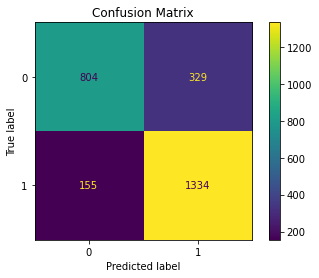

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix(df_test['user_suggestion'], testpreds5))
disp.plot()
plt.title('Confusion Matrix')
plt.savefig('cm_nb_test.png')
plt.show()